<Figure size 576x396 with 0 Axes>

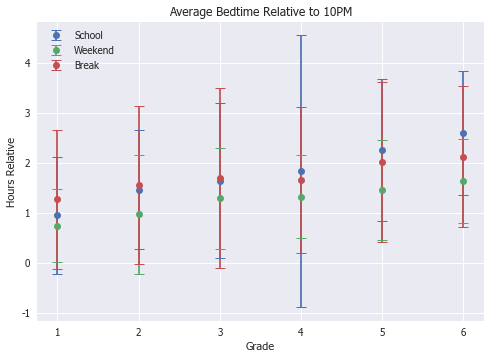

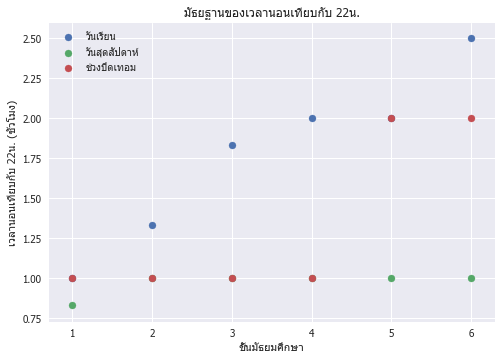

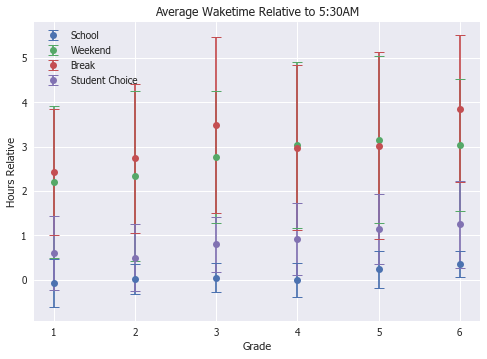

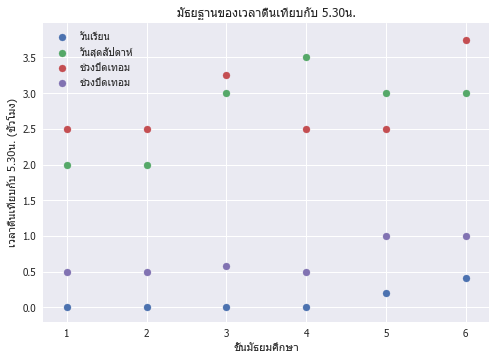

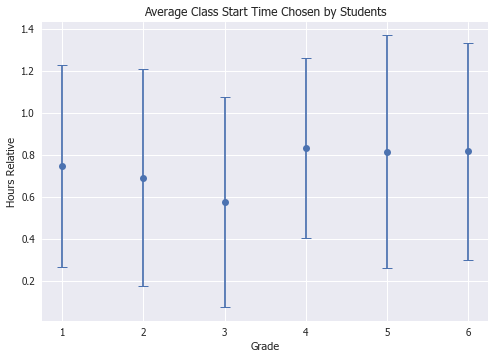

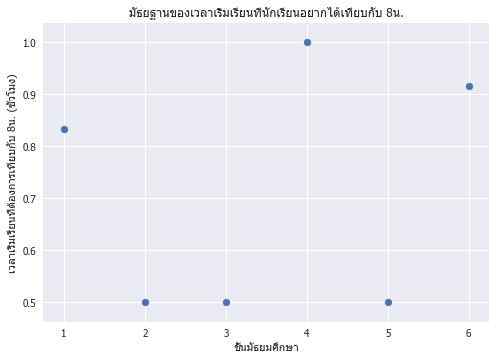

<Figure size 576x396 with 0 Axes>

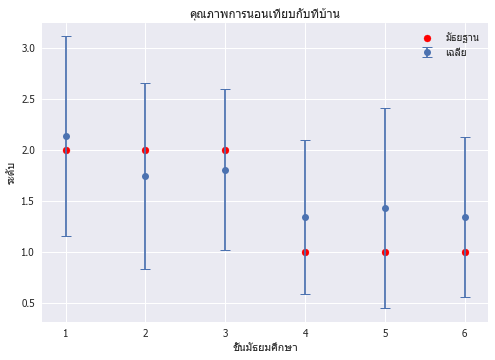

<Figure size 576x396 with 0 Axes>

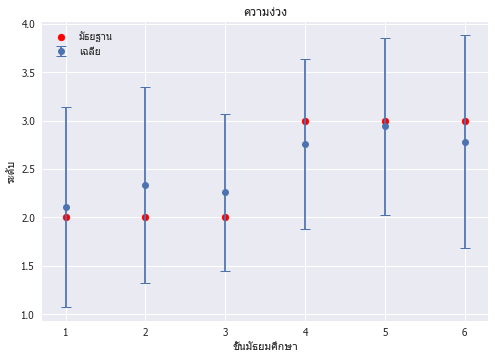

<Figure size 576x396 with 0 Axes>

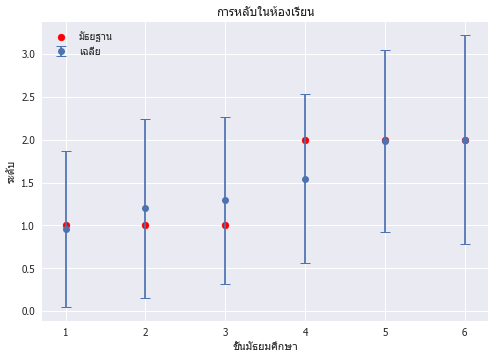

<Figure size 576x396 with 0 Axes>

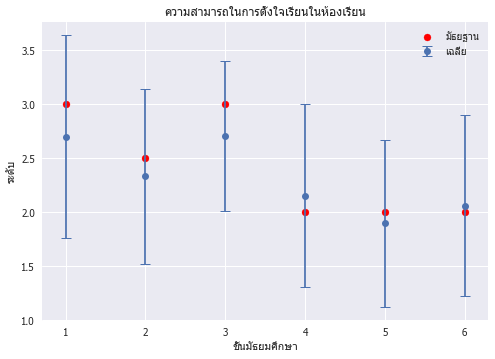

<Figure size 576x396 with 0 Axes>

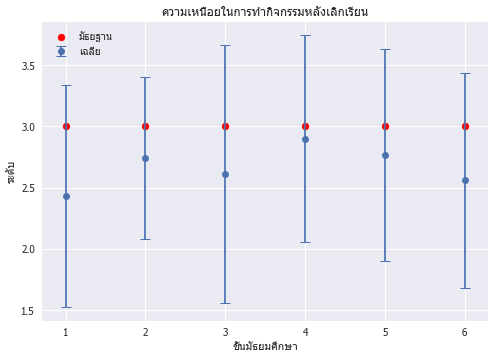

<Figure size 576x396 with 0 Axes>

In [52]:
import csv
import datetime as dt
from datetime import datetime
from statistics import mean, median, mode, stdev, median_low, median_high
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
    
path = "/Users/wsethapun20/Documents/Sleep/SurveyData5.csv"
file=open(path,newline='')
reader=csv.reader(file)

header=next(reader)

data=[]
for row in reader:
    grade=int(row[0])
    dorm=row[1]
    if not row[2]:
        bedschool=row[2]
        wakeschool=row[3]
    else:
        bedschool=datetime.strptime(row[2],'%H:%M')
        wakeschool=datetime.strptime(row[3],'%H:%M')
    if not row[4]:
        bedweekend=row[4]
        wakeweekend=row[5]
    else:
        bedweekend=datetime.strptime(row[4],'%H:%M')
        wakeweekend=datetime.strptime(row[5],'%H:%M')
    if not row[6]:
        bedvac=row[6]
        wakevac=row[7]
    else:
        bedvac=datetime.strptime(row[6],'%H:%M')
        wakevac=datetime.strptime(row[7],'%H:%M')
    if not row[8]:
        changestart=row[8]
    else:
        changestart=datetime.strptime(row[8],'%H:%M')
    if not row[9]:
        changealarm=row[9]
    else:
        changealarm=datetime.strptime(row[9],'%H:%M')
    timegetready=row[10]
    timedine=row[11]
    sleepq=int(row[12])
    sleepiness=int(row[13])
    dozed=int(row[14])
    concentration=int(row[15])
    fatigue=int(row[16])
    factor1=row[17]
    factor2=row[18]
    factor3=row[19]
    factor4=row[20]
    factor5=row[21]
    data.append([grade,dorm,bedschool,wakeschool,bedweekend,wakeweekend,bedvac,wakevac,changestart,changealarm,timegetready,timedine,sleepq,sleepiness,dozed,concentration,fatigue,factor1,factor2,factor3,factor4,factor5])

grades=['ม.1','ม.2','ม.3','ม.4','ม.5','ม.6']
#grades=['M.1','M.2','M.3','M.4','M.5','M.6']

def setfont(): 
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    plt.rcParams['font.serif'] = ['Tahoma']
    plt.rcParams['font.monospace'] = ['Tahoma']
    plt.rcParams['font.fantasy'] = ['Tahoma']
    plt.rcParams['font.cursive'] = ['Tahoma']
    plt.rcParams['font.family'] = ['Tahoma']
    plt.rcParams['axes.unicode_minus']=False
    #plt.rc('font',family='Tahoma')

def plotDemographics():
    setfont()
    gradeFrequency=[0,0,0,0,0,0]
    for row in data:
        if row[0]==1:
            gradeFrequency[0]+=1
        if row[0]==2:
            gradeFrequency[1]+=1
        if row[0]==3:
            gradeFrequency[2]+=1
        if row[0]==4:
            gradeFrequency[3]+=1
        if row[0]==5:
            gradeFrequency[4]+=1
        if row[0]==6:
            gradeFrequency[5]+=1
    plt.pie(gradeFrequency,labels=grades,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
    plt.title('ชั้นมัธยมศีกษาในปีการศึกษา พ.ศ.2562-2563 ของผู้กรอกแบบสอบถาม')
    plt.savefig('Demographics.png',dpi=500)
    plt.clf()
    
def extractAllGradeBedWakeTime(n):
    times=[]
    for row in data:
        if not row[n]:
            continue
        else:
            if row[n]<datetime(1900,1,1,19,0,0):
                times.append(row[n]+dt.timedelta(1))
            else:
                times.append(row[n])
    return times

def extractEachGradeBedWakeTime(n,grade):
    times=[]
    for row in data:
        if row[0]!=grade:
            continue
        else:
            if not row[n]:
                continue
            else:
                if row[n]<datetime(1900,1,1,19,0,0):
                    times.append(row[n]+dt.timedelta(1))
                else:
                    times.append(row[n])
    return times

def plotStackedGradeBedWakeTime(n):
    setfont()   
    plt.xlabel('เวลา (น.)')
    plt.ylabel('จำนวนนักเรียน')
    eachGradeTime=[]
    grade=1
    while(grade<7):
        eachGradeTime.append(extractEachGradeBedWakeTime(n,grade))
        grade=grade+1
    if n==2 or n==4 or n==6:
        ran=(datetime(1900,1,1,21,0),datetime(1900,1,2,5,0))
        plt.hist(eachGradeTime,bins=8,range=ran,edgecolor='Black',stacked=True,label=grades)
        plt.axvline(median_high(extractAllGradeBedWakeTime(n)),color='red',label='มัธยฐาน')
        plt.axvline(averageAllGradeTime(n),color='orange',label='เฉลี่ย')
        loc,lens=plt.xticks()
        plt.xticks(loc,('21', '22', '23', '24', '1','2','3','4','5'))
        plt.legend()
        if n==2: plt.title('เวลานอนในวันเรียน')
        if n==4: plt.title('เวลานอนในวันสุดสัปดาห์')
        if n==6: plt.title('เวลานอนในช่วงปิดเทอม')
    elif n==3 or n==5 or n==7:
        ran=(datetime(1900,1,2,4,0),datetime(1900,1,2,14,0))
        plt.hist(eachGradeTime,bins=10,range=ran,edgecolor='Black',stacked=True,label=grades) 
        plt.axvline(median_high(extractAllGradeBedWakeTime(n)),color='red',label='มัธยฐาน')
        plt.axvline(averageAllGradeTime(n),color='orange',label='เฉลี่ย')
        loc,lens=plt.xticks()
        plt.xticks(loc,('4', '5', '6', '7', '8','9','10','11','12','13','14'))
        plt.legend()
        if n==3: plt.title('เวลาตื่นในวันเรียน')
        if n==5: plt.title('เวลาตื่นในวันสุดสัปดาห์')
        if n==7: plt.title('เวลาตื่นในช่วงปิดเทอม')
    else:
        ran=(datetime(1900,1,2,4,0),datetime(1900,1,2,10,0))
        plt.hist(eachGradeTime,bins=12,range=ran,edgecolor='Black',stacked=True,label=grades) 
        plt.axvline(median_high(extractAllGradeBedWakeTime(n)),color='red',label='มัธยฐาน')
        plt.axvline(averageAllGradeTime(n),color='orange',label='เฉลี่ย')
        loc,lens=plt.xticks()
        plt.xticks(loc,('4', '5', '6', '7', '8','9','10'))
        plt.legend()
        if n==8: plt.title('เวลาเริ่มเรียนที่นักเรียนอยากได้')
        if n==9: plt.title('เวลาตื่นที่นักเรียนอยากได้')       
    plt.savefig('BedWakeTime'+str(n)+'.png',dpi=500)
    plt.clf()
    
def extractEachGradeSleepDuration(n,grade):
    durations=[]
    student=0
    while student<len(extractEachGradeBedWakeTime(n,grade)):
        duration=extractEachGradeBedWakeTime(n+1,grade)[student]-extractEachGradeBedWakeTime(n,grade)[student]
        duration=convert_timedelta(duration)
        durations.append(duration)
        student=student+1
    return durations

def extractAllGradeSleepDuration(n):
    durations=[]
    student=0
    while student<len(extractAllGradeBedWakeTime(n)):
        duration=extractAllGradeBedWakeTime(n+1)[student]-extractAllGradeBedWakeTime(n)[student]
        duration=convert_timedelta(duration)
        durations.append(duration)
        student=student+1
    return durations

def convert_timedelta(duration):
    seconds = duration.total_seconds()
    hours = seconds/3600
    return hours

def plotStackedGradeSleepDuration(n):
    setfont() 
    plt.xlabel('จำนวนชั่วโมงที่ได้นอน')
    plt.ylabel('จำนวนนักเรียน')
    eachGradesTime=[]
    grade=1
    while(grade<7):
        eachGradesTime.append(extractEachGradeSleepDuration(n,grade))
        grade=grade+1
    ran=(3,13)
    plt.hist(eachGradesTime,bins=10,range=ran,edgecolor='Black',stacked=True,label=grades)
    plt.axvline(median_high(extractAllGradeSleepDuration(n)),color='red',label='มัธยฐาน')
    plt.axvline(mean(extractAllGradeSleepDuration(n)),color='orange',label='เฉลี่ย')
    plt.legend()
    if n==2: plt.title('ระยะเวลาการนอนหลับในวันเรียน')
    if n==4: plt.title('ระยะเวลาการนอนหลับในวันสุดสัปดาห์')
    if n==6: plt.title('ระยะเวลาการนอนหลับในช่วงปิดเทอม')
    plt.savefig('SleepDuration'+str(n)+'.png',dpi=500)
    plt.clf()
    
def extractEachGradeRelativeTime(n,grade):
    length=len(extractEachGradeBedWakeTime(n,grade))
    relativeTimes=[]
    student=0 
    if n==2 or n==4 or n==6:
        while student<length:
            relativeTime=extractEachGradeBedWakeTime(n,grade)[student]-datetime(1900,1,1,22,0)
            relativeTimes.append(relativeTime)
            student=student+1
    if n==3 or n==5 or n==7 or n==9:
        while student<length:
            relativeTime=extractEachGradeBedWakeTime(n,grade)[student]-datetime(1900,1,2,5,30)
            relativeTimes.append(relativeTime)
            student=student+1
    if n==8:
        while student<length:
            relativeTime=extractEachGradeBedWakeTime(n,grade)[student]-datetime(1900,1,2,8,0)
            relativeTimes.append(relativeTime)
            student=student+1
    return relativeTimes

def extractAllGradeRelativeTime(n):
    length=len(extractAllGradeBedWakeTime(n))
    relativeTimes=[]
    student=0 
    if n==2 or n==4 or n==6:
        while student<length:
            relativeTime=extractAllGradeBedWakeTime(n)[student]-datetime(1900,1,1,22,0)
            relativeTimes.append(relativeTime)
            student=student+1
    if n==3 or n==5 or n==7 or n==9:
        while student<length:
            relativeTime=extractAllGradeBedWakeTime(n)[student]-datetime(1900,1,2,5,30)
            relativeTimes.append(relativeTime)
            student=student+1
    if n==8:
        while student<length:
            relativeTime=extractAllGradeBedWakeTime(n)[student]-datetime(1900,1,2,8,0)
            relativeTimes.append(relativeTime)
            student=student+1
    return relativeTimes

def averageEachGradeTime(n,grade):
    timedeltas=extractEachGradeRelativeTime(n,grade)
    average_timedelta = sum(timedeltas, dt.timedelta(0)) / len(timedeltas)
    if n==2 or n==4 or n==6:
        baseTime=datetime(1900,1,1,22,0)
    if n==3 or n==5 or n==7 or n==9:
        baseTime=datetime(1900,1,2,5,30)
    if n==8:
        baseTime=datetime(1900,1,2,8,0)
    averageTime=baseTime+average_timedelta
    return averageTime

def averageAllGradeTime(n):
    timedeltas=extractAllGradeRelativeTime(n)
    average_timedelta = sum(timedeltas, dt.timedelta(0)) / len(timedeltas)
    if n==2 or n==4 or n==6:
        baseTime=datetime(1900,1,1,22,0)
    if n==3 or n==5 or n==7 or n==9:
        baseTime=datetime(1900,1,2,5,30)
    if n==8:
        baseTime=datetime(1900,1,2,8,0)
    averageTime=baseTime+average_timedelta
    return averageTime

def extractEachGradeRelativeHour(n,grade):
    relativeHour=[]
    for relativeTime in extractEachGradeRelativeTime(n,grade):
        relativeHour.append(convert_timedelta(relativeTime))
    return relativeHour

def plotGradevBedTimeMedian():
    setfont()
    x=[1,2,3,4,5,6]
    y2=[]
    y4=[]
    y6=[]
    i=1
    while(i<7):
        y2.append(median(extractEachGradeRelativeHour(2,i)))
        y4.append(median(extractEachGradeRelativeHour(4,i)))
        y6.append(median(extractEachGradeRelativeHour(6,i)))
        i=i+1
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x,y2,label='วันเรียน')
    ax1.scatter(x,y4,label='วันสุดสัปดาห์')
    ax1.scatter(x,y6,label='ช่วงปิดเทอม')
    plt.legend()
    plt.title('มัธยฐานของเวลานอนเทียบกับ 22น.')   
    plt.xlabel('ชั้นมัธยมศึกษา')
    plt.ylabel('เวลานอนเทียบกับ 22น. (ชั่วโมง)')
    plt.show()

def plotGradevBedTime():
    setfont()
    x=[1,2,3,4,5,6]
    y2=[]
    y4=[]
    y6=[]
    y2error=[]
    y4error=[]
    y6error=[]
    i=1
    while(i<7):
        y2.append(mean(extractEachGradeRelativeHour(2,i)))
        y4.append(mean(extractEachGradeRelativeHour(4,i)))
        y6.append(mean(extractEachGradeRelativeHour(6,i)))
        y2error.append(stdev(extractEachGradeRelativeHour(2,i)))
        y4error.append(stdev(extractEachGradeRelativeHour(4,i)))
        y6error.append(stdev(extractEachGradeRelativeHour(6,i)))
        i=i+1
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.errorbar(x,y2,yerr=y4error,fmt='o',capsize=5,capthick=1,label='School')
    ax1.errorbar(x,y4,yerr=y2error,fmt='o',capsize=5,capthick=1,label='Weekend')
    ax1.errorbar(x,y6,yerr=y6error,fmt='o',capsize=5,capthick=1,label='Break')
    plt.legend()
    plt.title('Average Bedtime Relative to 10PM')  
    plt.xlabel('Grade')
    plt.ylabel('Hours Relative')
    plt.show()
    
def plotGradevWakeTimeMedian():
    setfont()
    x=[1,2,3,4,5,6]
    y3=[]
    y5=[]
    y7=[]
    y9=[]    
    i=1
    while(i<7):
        y3.append(median(extractEachGradeRelativeHour(3,i)))
        y5.append(median(extractEachGradeRelativeHour(5,i)))
        y7.append(median(extractEachGradeRelativeHour(7,i)))
        y9.append(median(extractEachGradeRelativeHour(9,i)))
        i=i+1    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x,y3,label='วันเรียน')
    ax1.scatter(x,y5,label='วันสุดสัปดาห์')
    ax1.scatter(x,y7,label='ช่วงปิดเทอม')
    ax1.scatter(x,y9,label='ช่วงปิดเทอม')
    plt.legend()
    plt.title('มัธยฐานของเวลาตื่นเทียบกับ 5.30น.')   
    plt.xlabel('ชั้นมัธยมศึกษา')
    plt.ylabel('เวลาตื่นเทียบกับ 5.30น. (ชั่วโมง)')
    plt.show()
    
def plotGradevWakeTime():
    setfont()
    x=[1,2,3,4,5,6]
    y3=[]
    y5=[]
    y7=[]
    y9=[]    
    y3error=[]
    y5error=[]
    y7error=[]
    y9error=[]
    i=1
    while(i<7):
        y3.append(mean(extractEachGradeRelativeHour(3,i)))
        y5.append(mean(extractEachGradeRelativeHour(5,i)))
        y7.append(mean(extractEachGradeRelativeHour(7,i)))
        y9.append(mean(extractEachGradeRelativeHour(9,i)))
        y3error.append(stdev(extractEachGradeRelativeHour(3,i)))
        y5error.append(stdev(extractEachGradeRelativeHour(5,i)))
        y7error.append(stdev(extractEachGradeRelativeHour(7,i)))
        y9error.append(stdev(extractEachGradeRelativeHour(9,i)))
        i=i+1    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.errorbar(x,y3,yerr=y3error,fmt='o',capsize=5,capthick=1,label='School')
    ax1.errorbar(x,y5,yerr=y5error,fmt='o',capsize=5,capthick=1,label='Weekend')
    ax1.errorbar(x,y7,yerr=y7error,fmt='o',capsize=5,capthick=1,label='Break')
    ax1.errorbar(x,y9,yerr=y9error,fmt='o',capsize=5,capthick=1,label='Student Choice')
    plt.legend()
    plt.title('Average Waketime Relative to 5:30AM')
    plt.xlabel('Grade')
    plt.ylabel('Hours Relative')
    plt.show()


def plotGradevSchoolStartMedian():
    setfont()
    x=[1,2,3,4,5,6]
    y8=[]
    i=1
    while(i<7):
        y8.append(median(extractEachGradeRelativeHour(8,i)))
        i=i+1
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x,y8)
    plt.title('มัธยฐานของเวลาเริ่มเรียนที่นักเรียนอยากได้เทียบกับ 8น.')   
    plt.xlabel('ชั้นมัธยมศึกษา')
    plt.ylabel('เวลาเริ่มเรียนที่ต้องการเทียบกับ 8น. (ชั่วโมง)')
    plt.show()
    
def plotGradevSchoolStart():
    setfont()
    x=[1,2,3,4,5,6]
    y8=[]
    y8error=[]
    i=1
    while(i<7):
        y8.append(mean(extractEachGradeRelativeHour(8,i)))
        y8error.append(stdev(extractEachGradeRelativeHour(8,i)))
        i=i+1
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.errorbar(x,y8,yerr=y8error,fmt='o',capsize=5,capthick=1)
    plt.title('Average Class Start Time Chosen by Students')  
    plt.xlabel('Grade')
    plt.ylabel('Hours Relative')
    plt.show()
    
def extractEachGradeRating(n,grade):
    rating=[0,0,0,0,0]
    for row in data:
        if row[0]==grade:
            if row[n]==0:
                rating[0]=rating[0]+1
            if row[n]==1:
                rating[1]=rating[1]+1
            if row[n]==2:
                rating[2]=rating[2]+1
            if row[n]==3:
                rating[3]=rating[3]+1
            if row[n]==4:
                rating[4]=rating[4]+1
    return rating

def extractAllGradeRatingList(n):
    rating=[]
    for row in data:
        rating.append(row[n])
    return rating

def extractEachGradeRatingList(n,grade):
    rating=[]
    for row in data:
        if row[0]==grade:
            rating.append(row[n])
    return rating

def plotGradevRating(n):
    setfont()
    x=[1,2,3,4,5,6]
    y=[]
    y2=[]
    yerror=[]
    i=1
    while(i<7):
        y.append(mean(extractEachGradeRatingList(n,i)))
        y2.append(median(extractEachGradeRatingList(n,i)))
        yerror.append(stdev(extractEachGradeRatingList(n,i)))
        i=i+1    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.errorbar(x,y,yerr=yerror,fmt='o',capsize=5,capthick=1,label='เฉลี่ย')
    ax1.scatter(x,y2,label='มัธยฐาน',color='red')
    plt.legend()   
    plt.xlabel('ชั้นมัธยมศึกษา')
    plt.ylabel('ระดับ')
    if n==12:
        plt.title('คุณภาพการนอนเทียบกับที่บ้าน')
    if n==13:
        plt.title('ความง่วง')
    if n==14:
        plt.title('การหลับในห้องเรียน')
    if n==15:
        plt.title('ความสามารถในการตั้งใจเรียนในห้องเรียน')
    if n==16:
        plt.title('ความเหนื่อยในการทำกิจกรรมหลังเลิกเรียน')
    plt.show()
    

def plotRatings(n):
    setfont()
    x=[0,1,2,3,4]
    ax = plt.figure().add_subplot()
    bars1=extractEachGradeRating(n,1)
    bars2=extractEachGradeRating(n,2)
    bars3=extractEachGradeRating(n,3)
    bars4=extractEachGradeRating(n,4)
    bars5=extractEachGradeRating(n,5)
    bars6=extractEachGradeRating(n,6)
    ax.bar(x,bars1,label='1')
    ax.bar(x,bars2,bottom=bars1,label='2')
    bars = np.add(bars1,bars2).tolist()
    ax.bar(x,bars3,bottom=bars,label='3')
    bars = np.add(bars,bars3).tolist()
    ax.bar(x,bars4,bottom=bars,label='4')
    bars = np.add(bars,bars4).tolist()
    ax.bar(x,bars5,bottom=bars,label='5')
    bars = np.add(bars,bars5).tolist()
    ax.bar(x,bars6,bottom=bars,label='6')    
    plt.xlabel('ระดับ')
    plt.ylabel('จำนวนนักเรียน')
    plt.axvline(median_high(extractAllGradeRatingList(n)),color='red',label='มัธยฐาน')
    plt.axvline(mean(extractAllGradeRatingList(n)),color='orange',label='เฉลี่ย')
    ax.legend()
    if n==12:
        plt.title('คุณภาพการนอนเทียบกับที่บ้าน')
    if n==13:
        plt.title('ความง่วง')
    if n==14:
        plt.title('การหลับในห้องเรียน')
    if n==15:
        plt.title('ความสามารถในการตั้งใจเรียนในห้องเรียน')
    if n==16:
        plt.title('ความเหนื่อยในการทำกิจกรรมหลังเลิกเรียน')
    plt.savefig('Ratings'+str(n)+'.png',dpi=500)
    plt.clf()
    
def extractFactorList(n,grade):
    factorList=[]
    for row in data:
        if row[0]==grade or grade==7:
            factorList.append(row[n])
    return factorList
            
def extractFactorPointsEachRank(n,grade):
    cnt=Counter()
    for factor in extractFactorList(n,grade):
        if(n==17):
            cnt[factor]+=5
        if(n==18):
            cnt[factor]+=4
        if(n==19):
            cnt[factor]+=3
        if(n==20):
            cnt[factor]+=2
        if(n==21):
            cnt[factor]+=1
    return cnt

def plotFactor(grade):
    setfont()
    points=extractFactorPointsEachRank(17,grade)
    for i in [18,19,20,21]:
        points=points+extractFactorPointsEachRank(i,grade)
    factorNames=[]
    impact=[]
    for item in points.most_common(5):
        factorNames.append(item[0])
        impact.append(item[1])
    plt.bar(factorNames,impact)    
    plt.xlabel('ปัจจัย')
    plt.ylabel('ระดับผลกระทบ')
    plt.xticks(rotation=45)
    if grade==7:
        plt.title('ปัจจัยที่มีผลต่อการนอน')
    else:
        plt.title('ปัจจัยที่มีผลต่อการนอนของม.'+str(grade))
    plt.savefig('Factor'+str(grade)+'.png',dpi=500)
    plt.clf()
    
def getPlots():
    setfont()
    plotDemographics()
    for i in [2,3,4,5,6,7,8,9]:
        plotStackedGradeBedWakeTime(i)
    for j in [2,4,6]:
        plotStackedGradeSleepDuration(j)
    plotGradevBedTime()
    plotGradevBedTimeMedian()
    plotGradevWakeTime()
    plotGradevWakeTimeMedian()
    plotGradevSchoolStart()
    plotGradevSchoolStartMedian()
    for k in [12,13,14,15,16]:
        plotRatings(k)
        plotGradevRating(k)
    for l in [1,2,3,4,5,6,7]:
        plotFactor(l)

getPlots()